<a href="https://colab.research.google.com/github/kteymouri/intro-ml-course-winter2025/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to upload our data file here.

In [2]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Datathon1-Dataset2 - HAD7001.csv']))

Saving Datathon1-Dataset2 - HAD7001.csv to Datathon1-Dataset2 - HAD7001.csv


Now we will get a better look at the data.


In [3]:
df.head()
print(df.shape) #getting the shape of the dataframe
print(df.columns)

(23535, 10)
Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')


Based on the information below, we will create a new column as Weight Status which will have one of the following status: Underweight (UW), Normal Weight (NM), Overweight (OW), and Obese (O)

In [4]:
import numpy as np

# Define the conditions
conditions = [
    (df['BMI'] < 18.5),                              # Underweight (UW)
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),      # Normal weight (NW)
    (df['BMI'] >= 25) & (df['BMI'] < 30),        # Overweight (OW)
    (df['BMI'] >= 30)                               # Obese (O)
]

# Define the corresponding values
values = ['UW', 'NW', 'OW', 'O']

# Use np.select to apply the conditions
df['Weight_Status'] = np.select(conditions, values, default='NA')

df.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Weight_Status
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,O
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,OW
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,OW
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,O
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,OW


Before we code the Gender and Weight status columns, we should check for NAs.


In [5]:
print(df['Gender'].unique())
print(df['Weight_Status'].unique())
print(df.isna().sum())
#We see that there are NA values for the Weight status. We should count them.

print(df['Weight_Status'].value_counts())

['Female' 'Male']
['O' 'OW' 'NW' 'UW']
Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
Weight_Status          0
dtype: int64
Weight_Status
NW    7922
OW    6444
O     6256
UW    2913
Name: count, dtype: int64


Now we will assign codes for the weight status and sex.




In [6]:
map_weight_code = {"UW" : 1,
                   "NW" : 2,
                   "OW" : 3,
                   "O" : 4}
map_gender = {"Female" : 0,
              "Male" : 1}
df['weight_code'] = df['Weight_Status'].map(map_weight_code)
df['gender_code'] = df['Gender'].map(map_gender)

df.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Weight_Status,weight_code,gender_code
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343,O,4,0
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877,OW,3,0
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417,OW,3,1
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720,O,4,0
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685,OW,3,0


We want to drop the height and weight columns because we don't need them as BMI is already calculated using height and weight.


In [7]:
from pickle import FALSE
df = df.drop(['Height' , 'Weight'], axis = 1, inplace= False)
df.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,BMI,Weight_Status,weight_code,gender_code
0,56,Female,3091,90,160,4,1,32.981343,O,4,0
1,69,Female,2090,106,27,0,9,27.973877,OW,3,0
2,46,Male,2938,11,45,2,3,26.640417,OW,3,1
3,32,Female,3022,48,112,1,8,42.813720,O,4,0
4,60,Female,2350,83,115,0,7,28.810685,OW,3,0


Now we should have some summary statistics to describe and better understand the statistical properties of our dataset.

In [8]:
print(df.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time           BMI   weight_code  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127     26.127641      2.681666   
std               1.414634      3.454036      6.875510      0.998108   
min               0.000000      0.000000      3.442184      1.0

We will implement KNN as our ML model to predict weight status using age, gender, calorie intake, physical activity, and screen time.


In [9]:
#We import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Now we split the data based on features and labels

X = df[['Age' , 'gender_code' , 'Calorie_Intake' , 'Physical_Activity' , 'Screen_Time']]
Y = df[['weight_code']]

#Splitting the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Now applying the KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Setting K to 5 as an example
knn.fit(X_train, Y_train)

# Predict using the test data
Y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[ 82 303 145  83]
 [153 754 391 264]
 [137 592 324 235]
 [118 612 314 200]]
              precision    recall  f1-score   support

           1       0.17      0.13      0.15       613
           2       0.33      0.48      0.39      1562
           3       0.28      0.25      0.26      1288
           4       0.26      0.16      0.20      1244

    accuracy                           0.29      4707
   macro avg       0.26      0.26      0.25      4707
weighted avg       0.28      0.29      0.27      4707



As we can see due to the imbalance in the categories, especially the underweight category, the prediction is not accurate.

To better understand the relationship among the features and to the target, we will look at the correlation between the features and the target.

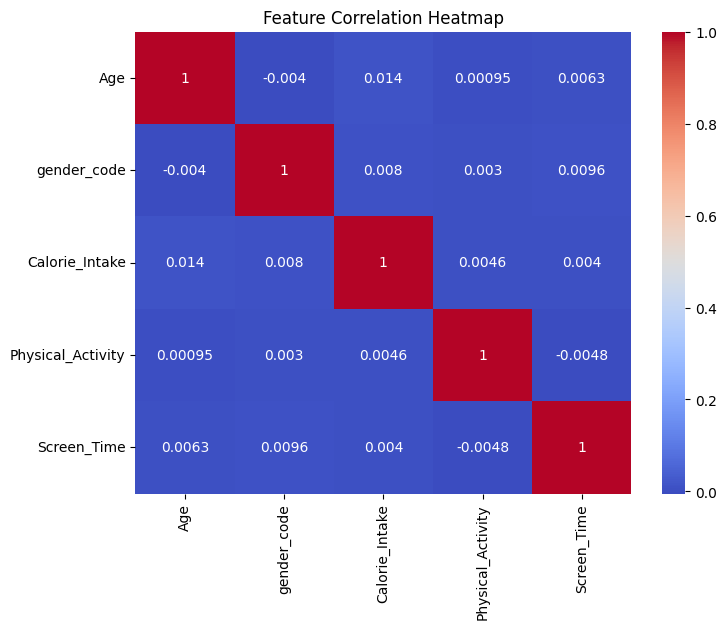

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Making sure the column names stay the same for the X_train
column_names = ['Age' , 'gender_code' , 'Calorie_Intake' , 'Physical_Activity' , 'Screen_Time']

#Combining the training features and the labels into a single data frame and changing it to a pandas dataframe
train_df = pd.DataFrame(X_train.copy(), columns = column_names)




#train_df['target_label'] = Y_train

train_df.head()

#Inspecting the correlation

plt.figure(figsize = (8,6))
sns.heatmap(train_df.corr(), annot=True , cmap ='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Now we will visualize our results

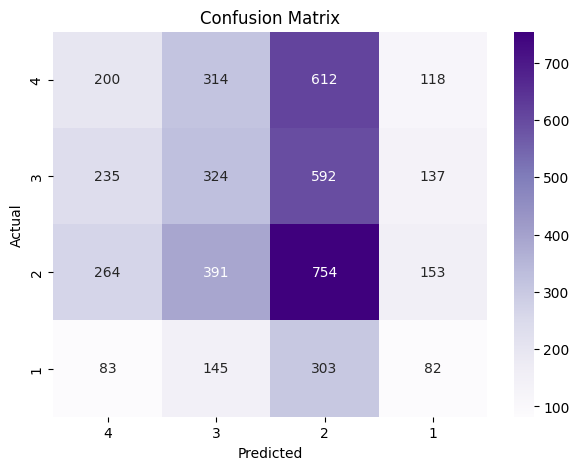

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get unique classes
classes = df['weight_code'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()